<a href="https://colab.research.google.com/github/ads-coding/COSC110-Labs/blob/main/lab2_titanic_monzon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset Cleaning & Analysis

# I. Steps in Cleaning the Dataset


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load and Understand the Dataset

In [43]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Remove Unnecessary Columns
The `PassengerId` column is simply an identifier and does not provide useful information for analysis.

In [44]:
df.drop(columns=['PassengerId'], inplace=True)

## 3. Fix Passenger Class (Pclass)
Some records have `Pclass = 0`, which is an invalid value.
We replace `0` with `Regular` to maintain consistency.

In [45]:
df['Pclass'] = df['Pclass'].replace(0, 'Regular')

## 4. Breakdown Name Column
The Name column is not in a machine-friendly format.
Extracting Title (e.g., Mr., Mrs., Miss) and Last Name allows for better categorization.

In [46]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Last_Name'] = df['Name'].str.split(',').str[0]
df.drop(columns=['Name'], inplace=True)

## 5. Standardize Gender Format
- Gender values should be uniform for consistency.
- Convert all values to lowercase.

In [47]:
df['Sex'] = df['Sex'].str.lower()

## 6. Handle Missing Cabin Data
- Instead of dropping Cabin, we fill missing values with "U" (Unknown).
- This allows potential future analysis on the presence of cabin assignments.

In [48]:
df['Cabin'] = df['Cabin'].fillna('U')

## 7. Handle Other Missing Values
- Fill **Age** with the median value to avoid data loss.
- Fill **Embarked** with the most common value.
- Fill **Fare** with the median value.

In [49]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

## 8. Remove Duplicates


In [50]:
df.drop_duplicates(inplace=True)

## 9. Fix Data Types
- Convert Pclass and Survived to categorical values.
- Converting them to category reduces memory usage and speeds up computations. Also, for data analysis later for Pclass.

In [51]:
df['Pclass'] = df['Pclass'].astype('category')
df['Survived'] = df['Survived'].astype('category')

## 10. Save the Cleaned Dataset

In [52]:
df.to_csv('titanic_cleaned.csv', index=False)

## II. Basic Data Analysis & Visualization


### 1. Average Age by Passenger Class
This bar graph shows the average age of passengers in each class.
- **First-class passengers** had the highest average age (`~37 years`), followed by **second class** (`~30 years`), and **third class** (`~25 years`).
- This implies that older, more financially stable passengers were more likely to travel in first class, while younger individuals were more common in third class.

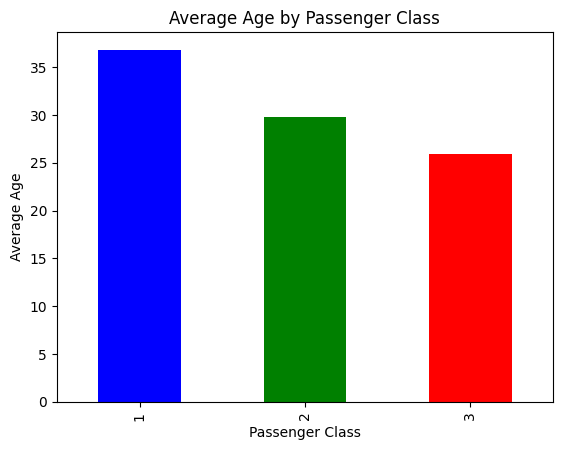

In [53]:
df.groupby('Pclass', observed=False)['Age'].mean().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Average Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Age')
plt.show()

### 2. Passenger Count by Gender and Class
This bar graph shows the number of male and female passengers in each class.
- Males significantly outnumber females in all three passenger classes.
- The **third** class has the highest number of passengers, with a majority being male.

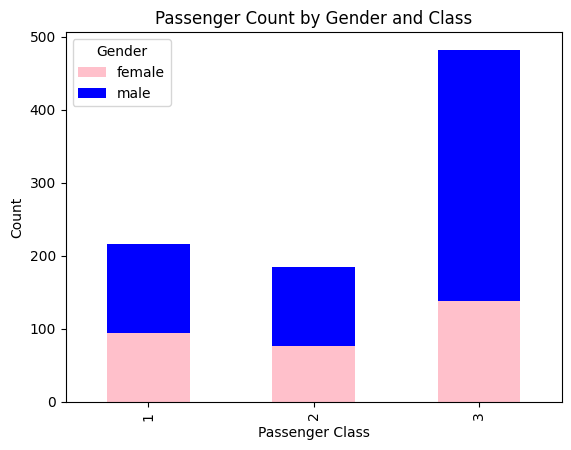

In [54]:
df.groupby(['Pclass', 'Sex'], observed=False).size().unstack().plot(kind='bar', stacked=True, color=['pink', 'blue'])
plt.title('Passenger Count by Gender and Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

### 3. Average Age by Gender
This bar graph shows the average age of male and female passengers.
- The average age of  **males ( ~ 30 years)** is slightly higher than that of **females ( ~ 27 years)**.
- This suggests that the male passengers were, on average, older than the female passengers.

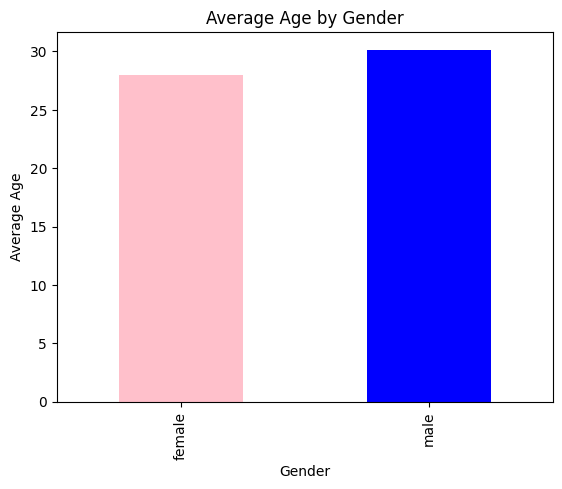

In [55]:
df.groupby('Sex')['Age'].mean().plot(kind='bar', color=['pink', 'blue'])
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

### 4. Average Fare by Gender
This bar graph shows the average fare paid by male and female passengers.
- Female passengers paid a **higher average fare (`~$45`)** compared to males (`~$25`).
- This may indicate that more females traveled in **higher-class cabins** or had access to better accommodations

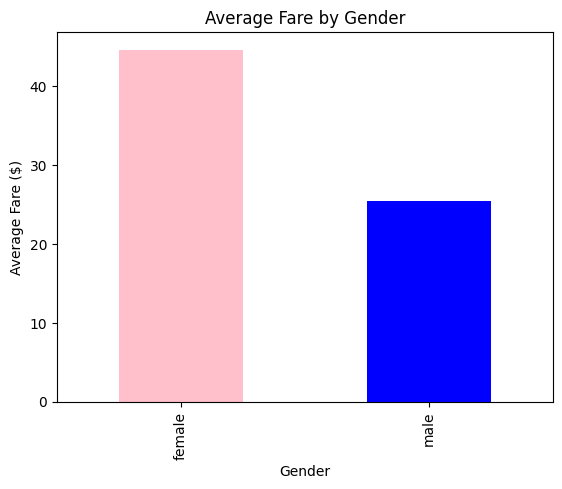

In [56]:
df.groupby('Sex')['Fare'].mean().plot(kind='bar', color=['pink', 'blue'])
plt.title('Average Fare by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Fare ($)')
plt.show()